Logistic regression to predict whether the customer purchased a Social Netwrok Ad or not.

In [1]:
# import required libraries
import numpy as np
import pandas as pd

In [2]:
# Reads a CSV file named 'Social_Network_Ads.csv' located at '/content/' into a Pandas DataFrame called 'df'.
# Displays the first few rows of the DataFrame 'df'.
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [3]:
# Returns the dimensions (number of rows and columns) of the DataFrame 'df'.
df.shape

(400, 5)

In [4]:
# Counts the occurrences of each unique value in the 'Purchased' column of the DataFrame 'df'.
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

####Checking for Null values

In [5]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

####Dropping irrelevant features (user ID)

In [6]:
df = df.drop(columns = ['User ID'],axis=1)
df.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

####Label Encoding

In [7]:
# Imports the LabelEncoder class from the sklearn.preprocessing module.
# Initializes a LabelEncoder object as 'le'.
# Encodes the 'Gender' column of the DataFrame 'df' using the LabelEncoder object 'le'.
# Displays the first few rows of the DataFrame 'df' after encoding the 'Gender' column.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

####Visualisation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

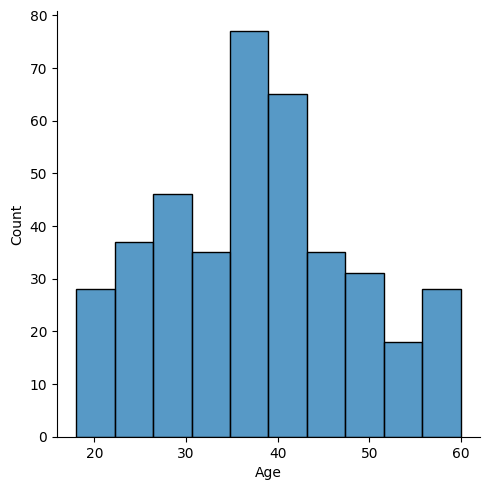

In [9]:
sns.displot(df.Age)

In [10]:
df.describe()

Gender         Age  EstimatedSalary   Purchased
count  400.000000  400.000000       400.000000  400.000000
mean     0.490000   37.655000     69742.500000    0.357500
std      0.500526   10.482877     34096.960282    0.479864
min      0.000000   18.000000     15000.000000    0.000000
25%      0.000000   29.750000     43000.000000    0.000000
50%      0.000000   37.000000     70000.000000    0.000000
75%      1.000000   46.000000     88000.000000    1.000000
max      1.000000   60.000000    150000.000000    1.000000

####Outlier detection

<Axes: ylabel='Age'>

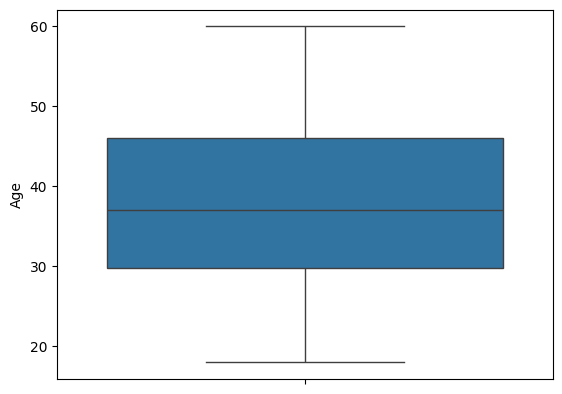

In [11]:
sns.boxplot(df.Age)

<Axes: ylabel='EstimatedSalary'>

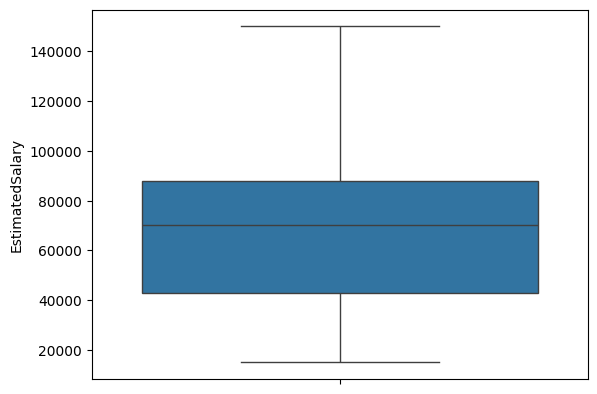

In [12]:
sns.boxplot(df.EstimatedSalary)

####Note: There are no outliers in the dataset

In [13]:
# Computes the pairwise correlation of columns in the DataFrame 'df'.
df.corr()

Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000

<Axes: >

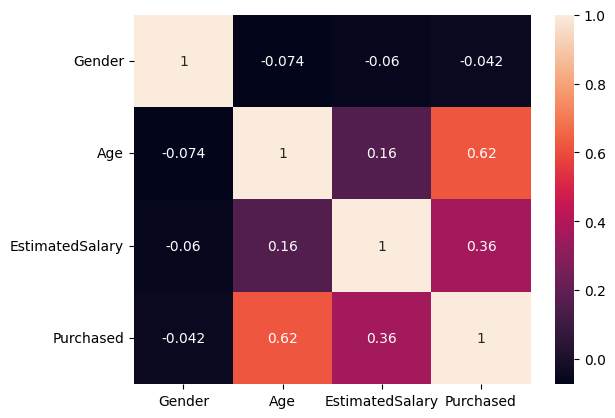

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.corr().Purchased.sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

####X and Y split

In [16]:
X=df.drop(columns=['Purchased'],axis=1)
X.head()

Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000

In [17]:
Y=df['Purchased']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

####Scaling the independent data

In [18]:
# Imports the MinMaxScaler class from the sklearn.preprocessing module.
# Initializes a MinMaxScaler object as 'scale'.
# Scales the features in DataFrame 'X' using the MinMaxScaler object 'scale' and stores the result in 'X_scaled'.
# Displays the first few rows of the scaled DataFrame 'X_scaled' with the same column names as 'X'.

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

Gender       Age  EstimatedSalary
0     1.0  0.023810         0.029630
1     1.0  0.404762         0.037037
2     0.0  0.190476         0.207407
3     0.0  0.214286         0.311111
4     1.0  0.023810         0.451852

####Train Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

####Check the training and testing data shape.

In [20]:
X_train.shape

(320, 3)

In [21]:
X_test.shape

(80, 3)

In [22]:
Y_train.shape

(320,)

In [23]:
Y_test.shape

(80,)

####Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

####predicting with random input

In [27]:
model.predict([[1,35,75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

####Evaluation for Classification model

In [28]:
# Accuracy Score

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.925

In [29]:
pd.crosstab(Y_test,pred)

col_0       0   1
Purchased        
0          58   0
1           6  16

In [30]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(Y_test,pred)

array([[58,  0],
       [ 6, 16]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [32]:
# precision = TP/TP+FP (of all positive predictions how many are really positive)

# recall = TP/TP+FN (of all real positive cases how many are predicted positive)

# f1-score = (2*precision*recall) / (precision + recall)

In [33]:
#AUC ROC Curve
# Computes the predicted probabilities of the positive class (class 1) using the trained model 'model' on the test data 'X_test'.
probability = model.predict_proba(X_test)[:,1]
probability

array([0.2144872 , 0.25275401, 0.27923866, 0.18905548, 0.19283512,
       0.05077814, 0.07141131, 0.61971028, 0.04489232, 0.45763683,
       0.11656137, 0.10458125, 0.2498842 , 0.39023091, 0.07753816,
       0.3782384 , 0.33667398, 0.06841339, 0.91815959, 0.12317974,
       0.18405501, 0.8529991 , 0.32802683, 0.73435186, 0.03755646,
       0.87354905, 0.17728525, 0.1753795 , 0.27483994, 0.25154865,
       0.08930984, 0.34527554, 0.78827655, 0.24277786, 0.07252234,
       0.03360677, 0.08785064, 0.15688678, 0.0996113 , 0.48076385,
       0.16428821, 0.33335936, 0.15340067, 0.11910455, 0.66423454,
       0.09922975, 0.34848964, 0.7865558 , 0.05454283, 0.70785041,
       0.92388136, 0.11649016, 0.21455017, 0.42591222, 0.88868144,
       0.35155547, 0.18309699, 0.13003618, 0.44394933, 0.03255284,
       0.08417465, 0.78880947, 0.05821796, 0.40782162, 0.02307795,
       0.89114604, 0.12344655, 0.09967335, 0.28809901, 0.44088787,
       0.5335957 , 0.28599525, 0.06358761, 0.30925421, 0.16693

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve

In [35]:
# Computes the false positive rate (fpr), true positive rate (tpr), and thresholds using the actual target labels 'Y_test' and predicted probabilities 'probability'.

fpr,tpr,threshsholds = roc_curve(Y_test,probability)

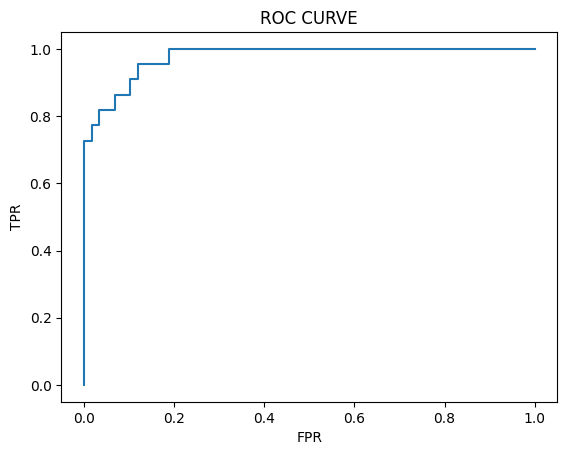

In [36]:
# Plots the Receiver Operating Characteristic (ROC) curve using the false positive rate (fpr) on the x-axis and true positive rate (tpr) on the y-axis.
# Labels the x-axis as 'FPR'.
# Labels the y-axis as 'TPR'.
# Sets the title of the plot as 'ROC CURVE'.
# Displays the plot.

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [37]:
# Computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) score using the actual target labels 'Y_test' and predicted probabilities 'probability'.
roc_auc_score(Y_test,probability)

0.975705329153605

Interpretation

Accuracy: The model correctly predicted 92.5% of the instances in the test set.
ROC AUC Score: The model's ability to distinguish between positive and negative classes is quite high, with an AUC score of 97.57%.

Precision: For class 0 (negative class), precision is high (91%), indicating that when the model predicts a customer did not purchase a Social Network Ad, it is correct 91% of the time. For class 1 (positive class), precision is perfect (100%), meaning that when the model predicts a customer did purchase an ad, it is always correct.

Recall: Class 0 has a perfect recall (100%), indicating that the model correctly identifies all instances of customers who did not purchase an ad. However, for class 1, recall is lower (73%), indicating that the model misses identifying some instances where customers did purchase an ad.

F1-score: The F1-score balances precision and recall. For class 0, it's high (95%), indicating a good balance between precision and recall. For class 1, it's lower (84%), indicating some imbalance between precision and recall, likely due to the lower recall score.

Overall, the model demonstrates strong performance in terms of accuracy and ROC AUC score. However, there may be room for improvement in terms of recall, particularly for class 1, to capture more instances of customers who purchased a Social Network Ad.